In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import astropy.units as units
import pandas as pd
import lightkurve as lk
import importlib

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
epic = '211416749'
numax = [224.3, 1.3]
dnu = [16.88, 0.05]
teff = [4851, 80]
bp_rp = [1.34, 0.2]

KeplerLightCurveFile(ID: 211416749)


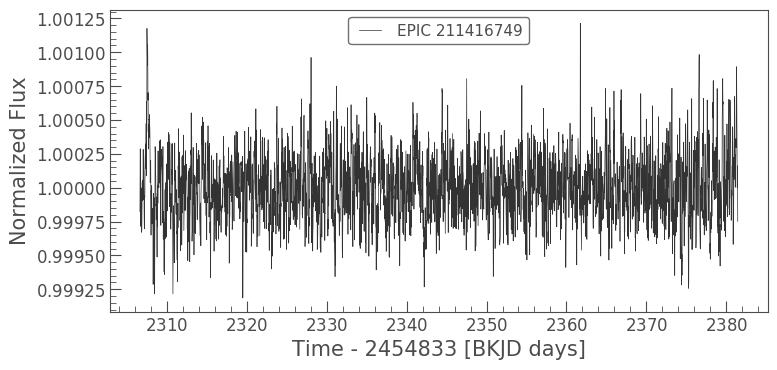

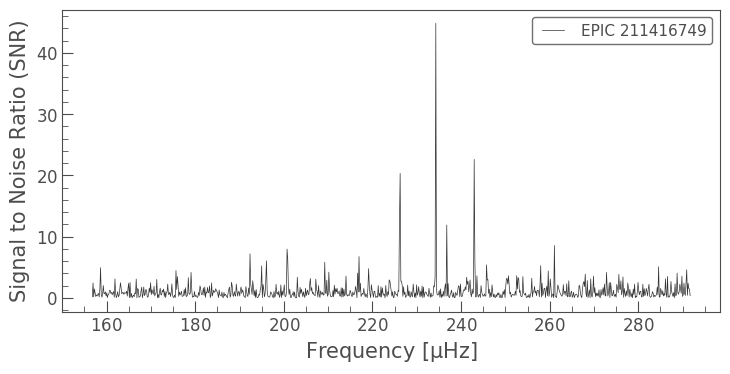

In [3]:
lcs = lk.search_lightcurvefile(epic, campaign=5).download()
print(lcs)
lc = lcs.PDCSAP_FLUX.normalize().flatten(window_length=401)
lc = lc.remove_outliers(5)
lc.plot()
pg = lc.to_periodogram(normalization='psd', minimum_frequency=numax[0] - dnu[0]*4, 
                       maximum_frequency=numax[0] + dnu[0]*4).flatten()
pg.plot()

In [4]:
star = pb.star(epic, pg, 
               numax, dnu, teff, bp_rp, 
               store_chains=True, 
               nthreads=4, make_plots=True)

w = 26
bw = 0.15473196240742482
loc_mid_02 = 116
w/2 = 13
loc_mid_02 = 224
w/2 = 13
loc_mid_02 = 333
w/2 = 13
loc_mid_02 = 441
w/2 = 13
loc_mid_02 = 551
w/2 = 13
loc_mid_02 = 661
w/2 = 13


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [01:02<00:00, 128.58draws/s]
The number of effective samples is smaller than 25% for some parameters.


CPU times: user 2min 44s, sys: 2.85 s, total: 2min 46s
Wall time: 3min 50s


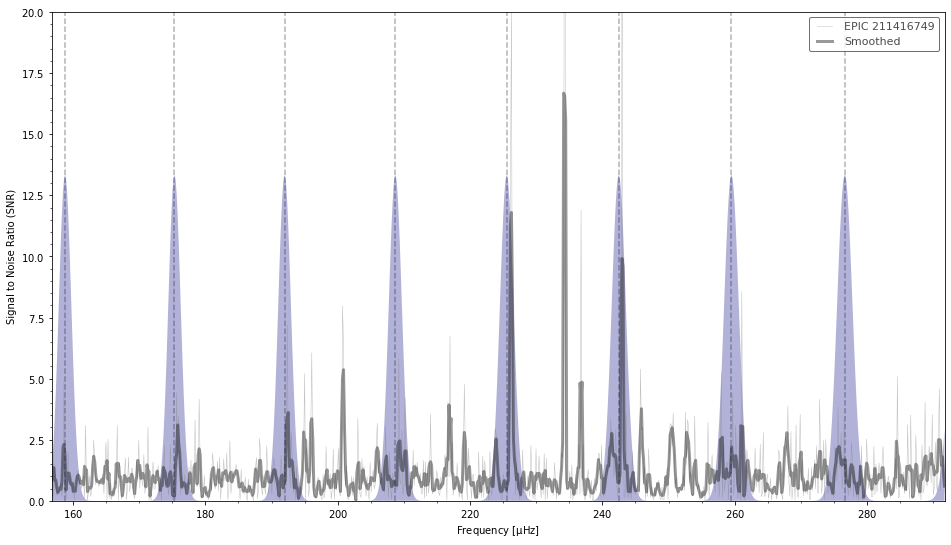

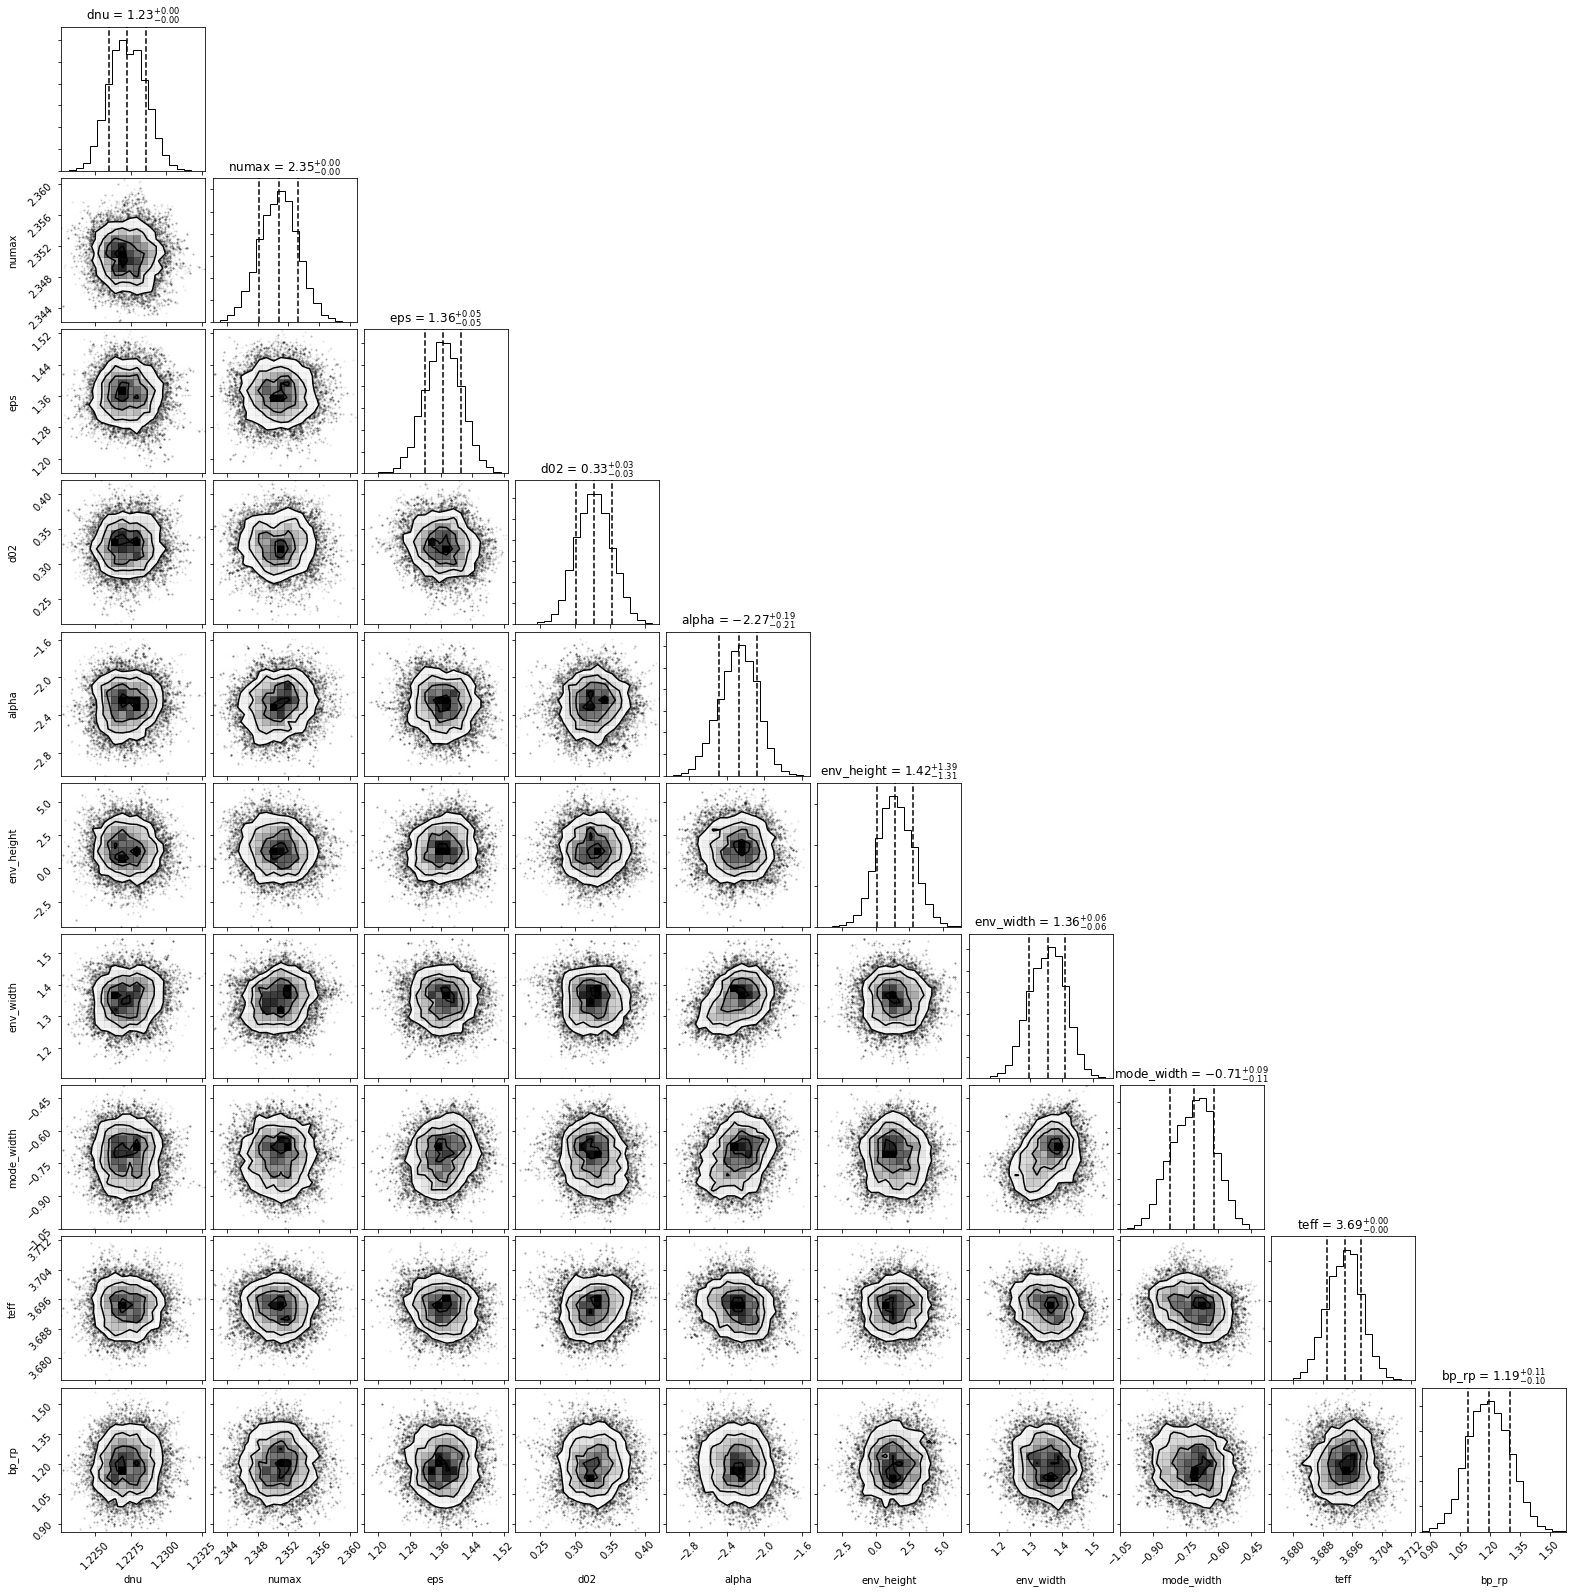

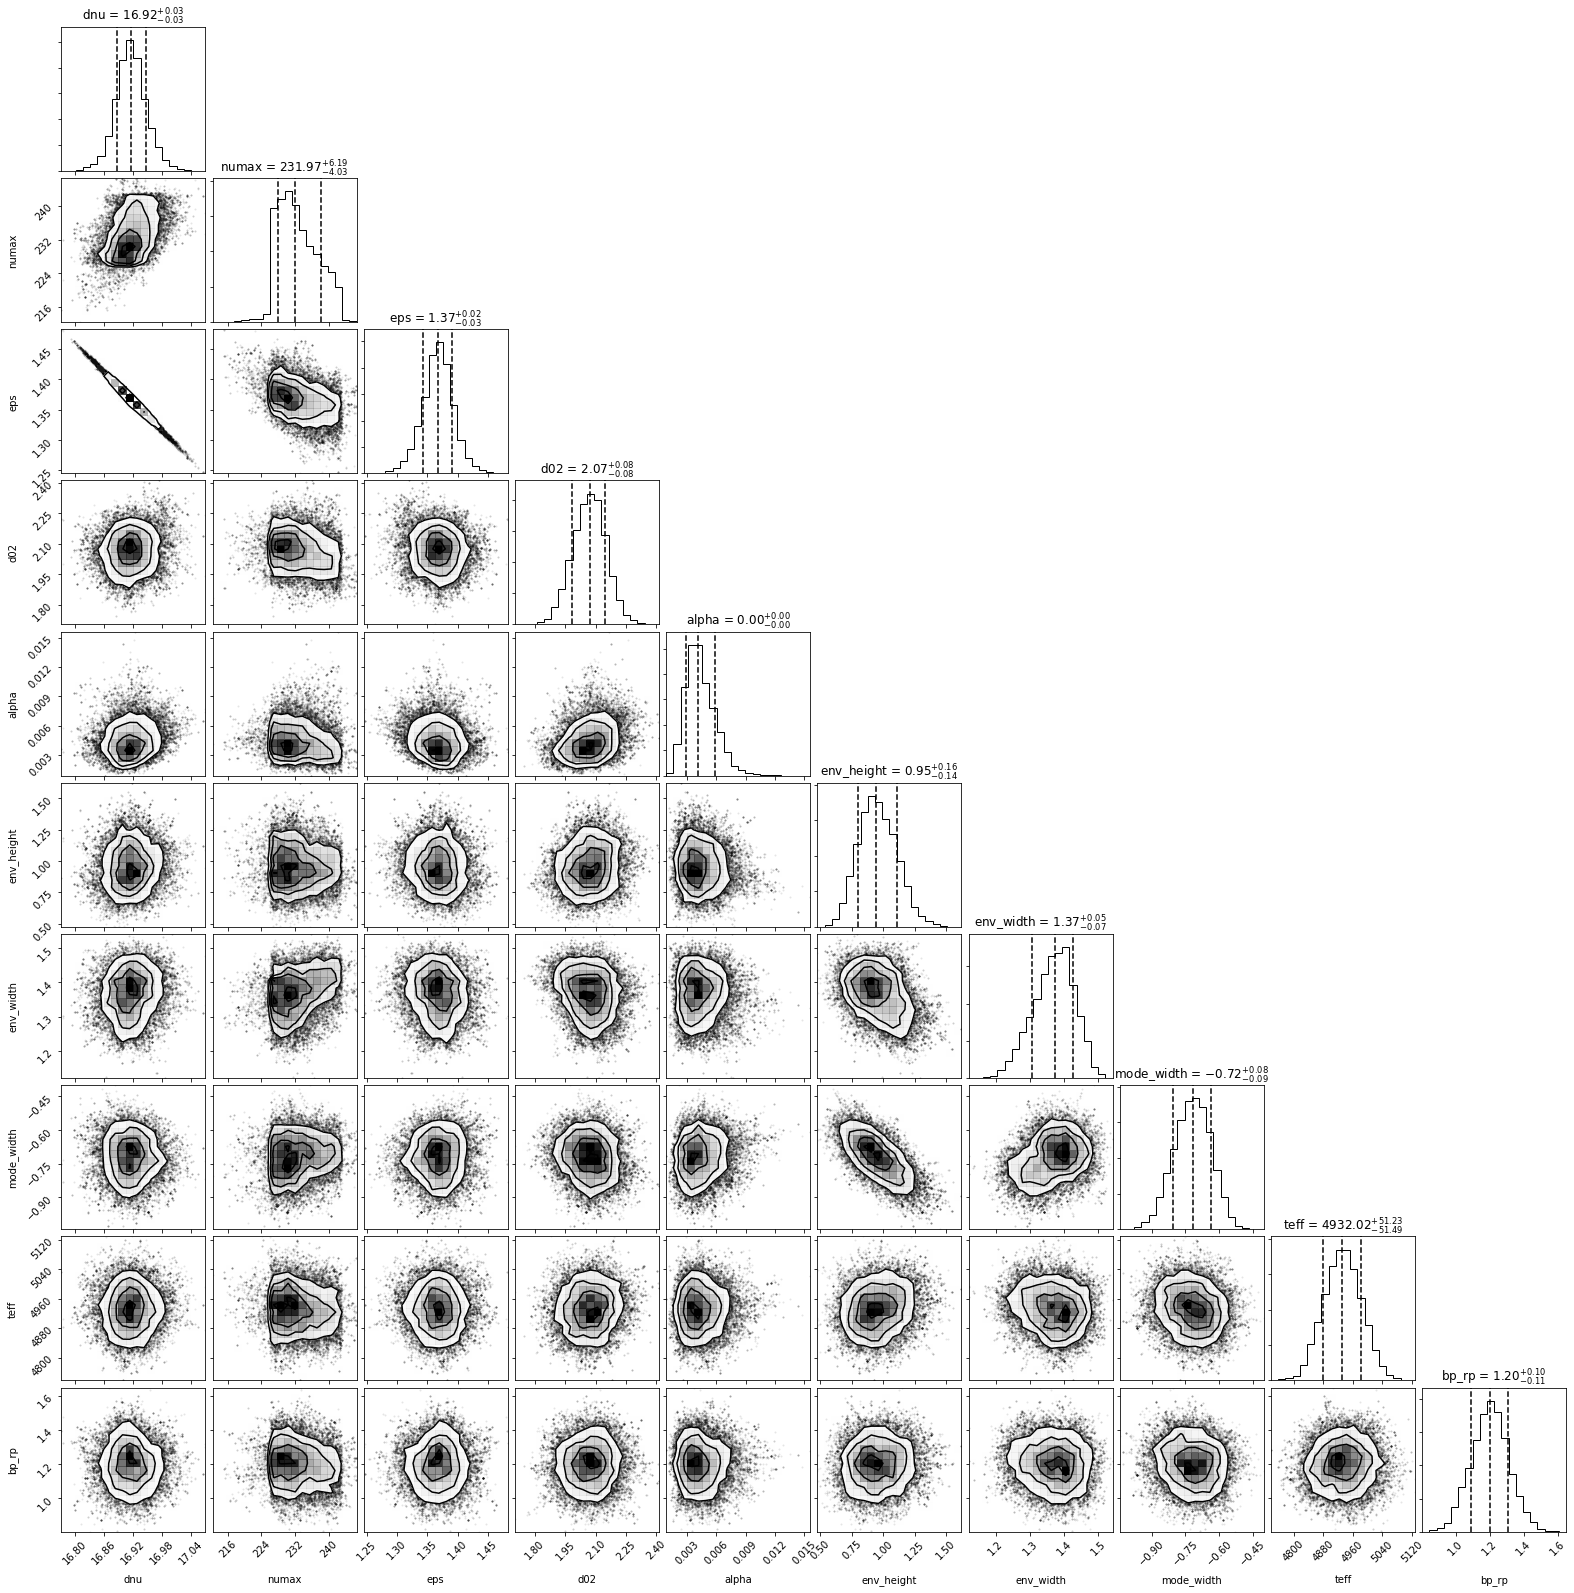

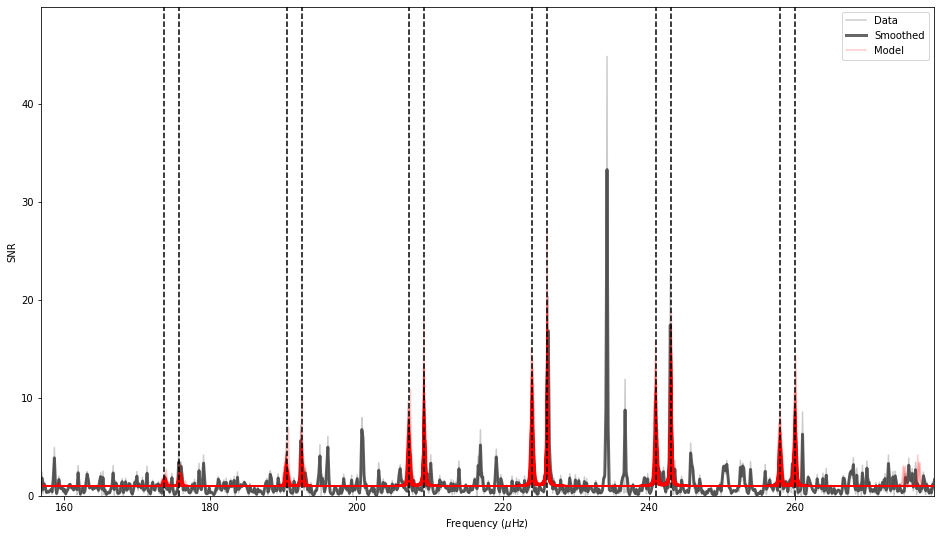

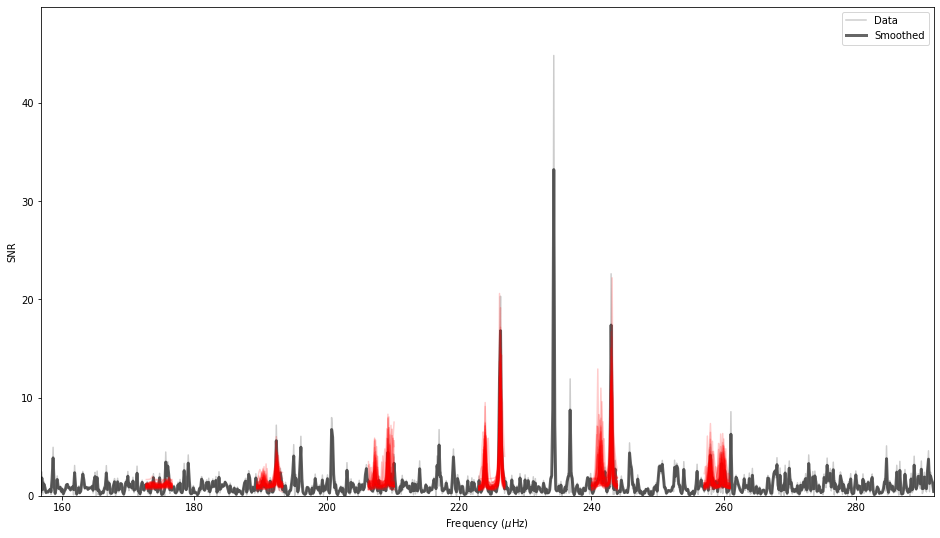

In [7]:
%%time
star(norders=6)

In [10]:
import pymc3 as pm
pm.summary(star.peakbag.samples)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
l0__0,175.819197,0.387090,0.009780,174.825176,176.575224,1597.136958,0.999232
l0__1,192.463519,0.237569,0.008556,192.095342,193.070123,727.119352,1.000818
l0__2,209.422906,0.397058,0.015881,208.776758,210.385808,497.550412,1.004195
l0__3,226.221926,0.061670,0.001606,226.109095,226.358283,1443.449415,0.999942
l0__4,242.989440,0.066477,0.003101,242.867277,243.117936,276.652316,1.002803
l0__5,259.885153,0.378161,0.014227,259.209000,260.747646,657.509028,1.001805
l2__0,173.721982,0.484824,0.012657,172.718327,174.723488,1549.423858,0.999823
l2__1,190.384695,0.440040,0.011060,189.417081,191.251513,1375.804351,0.999720
l2__2,207.192541,0.472952,0.017116,206.049039,208.099862,764.689014,1.003276
l2__3,223.916128,0.263188,0.010883,223.444378,224.521541,473.333043,1.002309


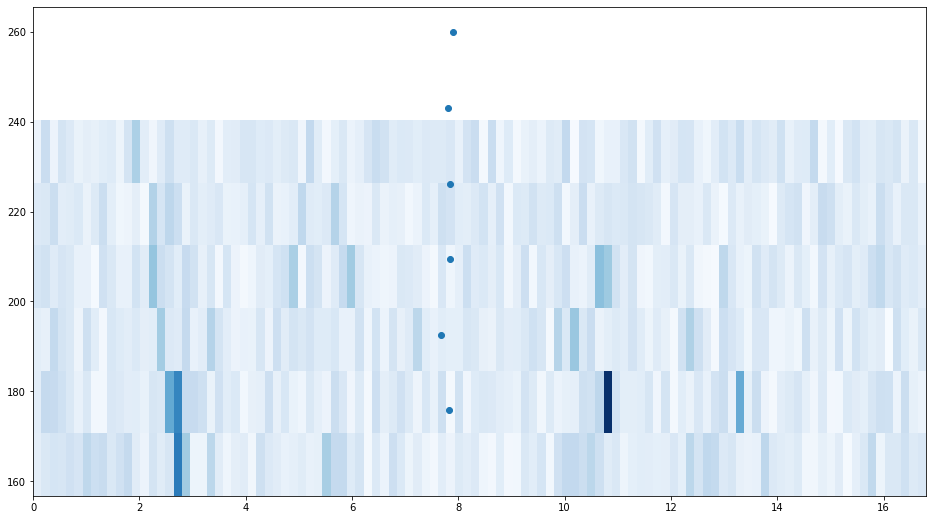

In [59]:
import astropy.convolution as conv
fig, ax = plt.subplots(figsize=[16,9])
dnu = np.median(np.diff(np.sort(star.peakbag.samples['l0'].mean(axis=0))))
bw = star.peakbag.f[1] - star.peakbag.f[0]
w = int(dnu / bw)
norder = len(star.peakbag.n)
start = int((np.floor(star.peakbag.f.min() // dnu) + 1) * dnu * bw)
ff = star.peakbag.f[start: start+w*norder]
ss = star.peakbag.snr[start: start+w*norder]
extent = (0, dnu, star.peakbag.f[0], star.peakbag.f[w*(norder-1)])

smoo = dnu * 0.002 / bw
kernel = conv.Gaussian1DKernel(stddev=smoo)
smoothed = conv.convolve(star.peakbag.snr, kernel)
data = smoothed[:w*norder].reshape(norder, w)
ef = star.peakbag.f[:w*norder].reshape(norder, w)
ax.imshow((data**0.5), aspect='auto', cmap='Blues', extent=extent)

l0 = star.peakbag.samples['l0'].mean(axis=0)
ax.scatter(l0 % dnu, l0)